Pandas has built in many vectorized string methods that can perform data cleaning tasks quicker and with less keystrokes.

In this notebook we will focus on string cleaning tasks such as:
    
- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series

We'll work with the 2015 World Happiness Report again and additional economic data from the World Bank. 

Below are descriptions for the columns we'll be working with:

- ShortName - Name of the country
- Region - The region the country belongs to
- IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita
- CurrencyUnit - Name of country's currency
- SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
- SpecialNotes - Contains any miscellaneous notes about the data

In [1]:
import pandas as pd
world_dev = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/World_dev.csv")
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [2]:
import pandas as pd
happiness2015 = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/World_Happiness_2015.csv")
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness2015.shape

(158, 12)

In [4]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}


In [5]:
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,Budgetary central government,General Data Dissemination System (GDDS),2012,"Malaria Indicator Survey (MIS), 2013","Integrated household survey (IHS), 2010/11",NaN,2008,NaN,2013.0,2000.0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,Budgetary central government,General Data Dissemination System (GDDS),2013,"Multiple Indicator Cluster Survey (MICS), 2014",Core Welfare Indicator Questionnaire Survey (C...,NaN,2011/12,NaN,2013.0,2001.0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,Consolidated central government,General Data Dissemination System (GDDS),2008,"Malaria Indicator Survey (MIS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,2010.0,2012.0,2000.0


In [6]:
merged.columns

Index(['Country', 'Region_x', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'CountryCode', 'ShortName',
       'TableName', 'LongName', 'Alpha2Code', 'CurrencyUnit', 'SpecialNotes',
       'Region_y', 'IncomeGroup', 'Wb2Code', 'NationalAccountsBaseYear',
       'NationalAccountsReferenceYear', 'SnaPriceValuation', 'LendingCategory',
       'OtherGroups', 'SystemOfNationalAccounts',
       'AlternativeConversionFactor', 'PppSurveyYear',
       'BalanceOfPaymentsManualInUse', 'ExternalDebtReportingStatus',
       'SystemOfTrade', 'GovernmentAccountingConcept',
       'ImfDataDisseminationStandard', 'LatestPopulationCensus',
       'LatestHouseholdSurvey', 'IESurvey', 'VitalRegistrationComplete',
       'LatestAgriculturalCensus', 'LatestIndustrialData', 'LatestTradeData',
       'LatestWaterWithdrawalData'],
      d

In [7]:
merged['CurrencyUnit']

0                 Swiss franc
1               Iceland krona
2                Danish krone
3             Norwegian krone
4             Canadian dollar
                ...          
153             Rwandan franc
154    West African CFA franc
155                       NaN
156             Burundi franc
157    West African CFA franc
Name: CurrencyUnit, Length: 158, dtype: object

In [8]:
# return finalword
def extract_last_word(element):
    return str(element).split()[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [9]:
merged['Currency Apply']

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       nan
156     franc
157     franc
Name: Currency Apply, Length: 158, dtype: object

## Vectorized string methods

In [10]:
merged['CurrencyUnit'].str[0:5]

0      Swiss
1      Icela
2      Danis
3      Norwe
4      Canad
       ...  
153    Rwand
154    West 
155      NaN
156    Burun
157    West 
Name: CurrencyUnit, Length: 158, dtype: object

In [11]:
merged['CurrencyUnit'].str.upper().str.split()

0                   [SWISS, FRANC]
1                 [ICELAND, KRONA]
2                  [DANISH, KRONE]
3               [NORWEGIAN, KRONE]
4               [CANADIAN, DOLLAR]
                  ...             
153               [RWANDAN, FRANC]
154    [WEST, AFRICAN, CFA, FRANC]
155                            NaN
156               [BURUNDI, FRANC]
157    [WEST, AFRICAN, CFA, FRANC]
Name: CurrencyUnit, Length: 158, dtype: object

In [12]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized']

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: Currency Vectorized, Length: 158, dtype: object

## Exploring missing values

In [13]:
merged['CurrencyUnit'].isnull().sum() # 13 missing values

13

In [14]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [15]:
lengths_apply

0      11
1      13
2      12
3      15
4      15
       ..
153    13
154    22
155     3
156    13
157    22
Name: CurrencyUnit, Length: 158, dtype: int64

In [16]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

Since the original column had 13 missing values and NaN doesn't appear in the list of unique values above, we know our function must have treated NaN as a string and returned a length of 3 for each NaN value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been excluded from the calculation.

If we wanted to exclude missing values, we'd have to update our function to something like this:

In [17]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [18]:
lengths_apply

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [19]:
lengths = merged['CurrencyUnit'].str.len()
lengths

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [20]:
value_counts = lengths.value_counts(dropna=False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

- series.str.len() method does not treat NaN as strings.
- series.apply() does. So it is best to use the vectorised string method series.str.len() in this case.

# Regular expressions

In [21]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts

0       NaN
1       NaN
2       NaN
3       NaN
4      True
       ... 
153    True
154     NaN
155     NaN
156     NaN
157    True
Name: SpecialNotes, Length: 158, dtype: object

In [22]:
# Return the value counts for each value in the Series, including missing values.
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [23]:
merged[national_accounts]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

We got an error now because of the NaN values! One way we could fix this is to change the NaN values to False in national_accounts.

In [24]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False) # Fill value for missing values
national_accounts

0      False
1      False
2      False
3      False
4       True
       ...  
153     True
154    False
155    False
156    False
157     True
Name: SpecialNotes, Length: 158, dtype: bool

In [25]:
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [26]:
merged_national_accounts = merged[national_accounts]
merged_national_accounts

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,...,2010,"World Health Survey (WHS), 2003",NaN,NaN,2012,2010.0,2011.0,2005.0,dirham,dirham
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,...,2010,"National Health Survey (NHS), 2010",NaN,Yes,NaN,2011.0,2013.0,1975.0,dollar,dollar
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,...,2011,"Multiple Indicator Cluster Survey (MICS), 2012/13","Integrated household survey (IHS), 2013",Yes,2011,2009.0,2013.0,2000.0,peso,peso
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,...,2010,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2011",NaN,2013,2006.0,2013.0,2007.0,baht,baht
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,...,2011,"Family Health Survey (FHS), 1996",NaN,Yes,NaN,2011.0,2013.0,2002.0,dinar,dinar


In [27]:
merged_national_accounts.shape

(54, 45)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

In [28]:
merged_national_accounts.columns

Index(['Country', 'Region_x', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'CountryCode', 'ShortName',
       'TableName', 'LongName', 'Alpha2Code', 'CurrencyUnit', 'SpecialNotes',
       'Region_y', 'IncomeGroup', 'Wb2Code', 'NationalAccountsBaseYear',
       'NationalAccountsReferenceYear', 'SnaPriceValuation', 'LendingCategory',
       'OtherGroups', 'SystemOfNationalAccounts',
       'AlternativeConversionFactor', 'PppSurveyYear',
       'BalanceOfPaymentsManualInUse', 'ExternalDebtReportingStatus',
       'SystemOfTrade', 'GovernmentAccountingConcept',
       'ImfDataDisseminationStandard', 'LatestPopulationCensus',
       'LatestHouseholdSurvey', 'IESurvey', 'VitalRegistrationComplete',
       'LatestAgriculturalCensus', 'LatestIndustrialData', 'LatestTradeData',
       'LatestWaterWithdrawalData', 'Currenc

In [29]:
merged_national_accounts['SpecialNotes'].head()

4     Fiscal year end: March 31; reporting period fo...
7     Fiscal year end: June 30; reporting period for...
8     Fiscal year end: March 31; reporting period fo...
9     Fiscal year end: June 30; reporting period for...
14    Fiscal year end: September 30; reporting perio...
Name: SpecialNotes, dtype: object

## Extracting characters from strings

In [ ]:
#range of numbers
pattern = r"[0-9]"

#lowercase letters
pattern1 = r"[a-z]"

#uppercase letters
pattern2 = r"[A-Z]"

pattern = r"[1-6][a-z][a-z]"
pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}" # { and } to indicate the number of times it repeats

In [30]:
pattern =r"()"
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [31]:
merged = merged.set_index('Country')
merged.head()

,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


In [32]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
...                 ...
Rwanda      1      2011
            2      2008
Togo        0      2013
            1      2000
            2      2000

[164 rows x 1 columns]

In [33]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
years

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010
...,...,...
Afghanistan,0,2008
Rwanda,0,2010
Benin,0,2011


In [34]:
value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1992     1
2003     1
2006     1
2002     1
2000     1
1995     1
1999     1
1998     1
Name: Years, dtype: int64


In [35]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
years

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN
...,...,...,...,...
Afghanistan,0,2008,NaN,NaN
Rwanda,0,2010,/,11
Benin,0,2011,/,12


In [36]:
years.sort_values('Second_Year')

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10
...,...,...,...,...
Guinea,0,2012,NaN,NaN
Burkina Faso,0,2009,NaN,NaN
Afghanistan,0,2008,NaN,NaN


In [37]:
first_two_year = years['First_Year'].str[0:2]
first_two_year

Country      match
Switzerland  0        20
Iceland      0        20
Denmark      0        20
Norway       0        20
Canada       0        20
                      ..
Afghanistan  0        20
Rwanda       0        20
Benin        0        20
Burundi      0        20
Togo         0        20
Name: First_Year, Length: 130, dtype: object

In [38]:
years['Second_Year'] = first_two_year + years['Second_Year']
years['Second_Year']

Country      match
Switzerland  0         NaN
Iceland      0         NaN
Denmark      0         NaN
Norway       0         NaN
Canada       0         NaN
                      ... 
Afghanistan  0         NaN
Rwanda       0        2011
Benin        0        2012
Burundi      0         NaN
Togo         0         NaN
Name: Second_Year, Length: 130, dtype: object

In [39]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


<AxesSubplot:xlabel='IncomeGroup'>

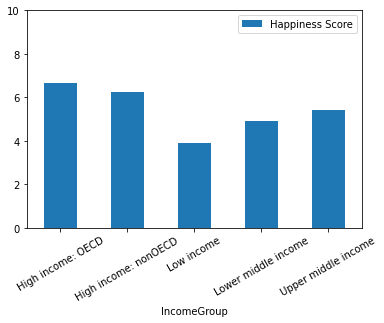

In [40]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))

In [41]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
merged['IncomeGroup']

Country
Switzerland    HIGH OECD
Iceland        HIGH OECD
Denmark        HIGH OECD
Norway         HIGH OECD
Canada         HIGH OECD
                 ...    
Rwanda               LOW
Benin                LOW
Syria                NaN
Burundi              LOW
Togo                 LOW
Name: IncomeGroup, Length: 158, dtype: object

In [42]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718


<AxesSubplot:xlabel='IncomeGroup'>

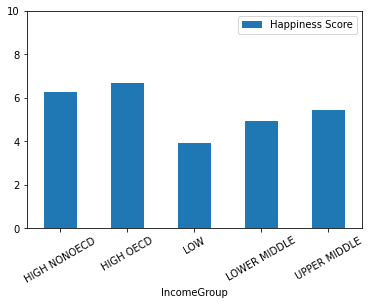

In [43]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))


Thank you!